In [1]:
# import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read and have a look at the dataset 
df_train = pd.read_excel('Project - 4 - Train Data.xlsx')
df_test = pd.read_excel('Project - 4 - Test Data.xlsx')

In [3]:
print(df_train.shape)
print(df_test.shape)

(614, 20)
(367, 19)


In [4]:
df_train.head()

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status
0,CPL001002,M,N,Austin,Pennycook,apennycook1@mac.com,007 Miller Road,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,Y
1,CPL001003,M,Y,Mareah,Tomanek,mtomanek2@bloomberg.com,145 Charing Cross Junction,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,N
2,CPL001005,M,Y,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,268 Algoma Hill,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,Y
3,CPL001006,M,Y,Danyette,Stempe,dstempe4@tumblr.com,571 Stone Corner Park,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,Y
4,CPL001008,M,N,Patten,McCathy,pmccathy5@ted.com,118 Moulton Drive,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,23293411,38-247-1410,Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKi...,Y


# Feature Selection

In [5]:
#drop those columns which have unique string and are not necessary for our final prediction

df_train = df_train.drop(['Loanapp_ID', 'first_name', 'last_name', 'email', 'address', 'INT_ID', 'Prev_ID', 'AGT_ID'], axis = 1)
df_test = df_test.drop(['Loanapp_ID', 'first_name', 'last_name', 'email', 'address', 'INT_ID', 'Prev_ID', 'AGT_ID'], axis = 1)

In [6]:
df_train.head()

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status
0,M,N,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,Y
1,M,Y,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,N
2,M,Y,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,Y
3,M,Y,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,Y
4,M,N,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,Y


# Exploratory Data Analysis

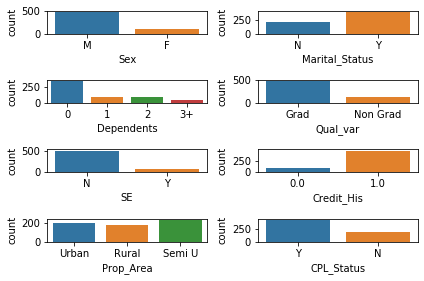

In [7]:
columns = ['Sex', 'Marital_Status', 'Dependents', 'Qual_var', 'SE', 'Credit_His', 'Prop_Area', 'CPL_Status']

for i in range(len(columns)) :
    plt.tight_layout()
    plt.subplot(4, 2, i+1)
    sns.countplot(data = df_train, x = columns[i])

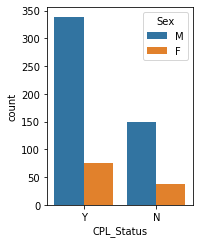

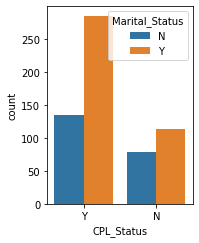

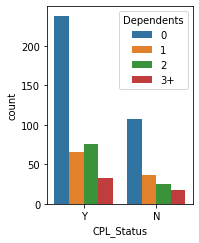

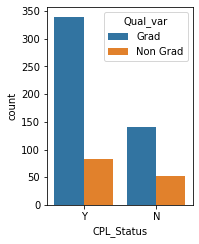

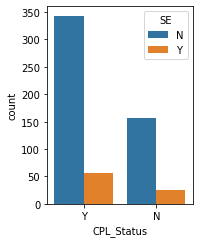

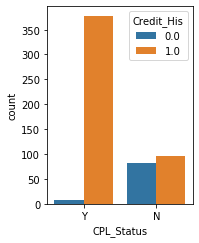

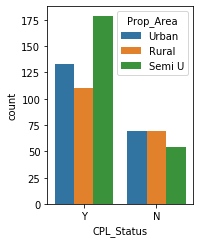

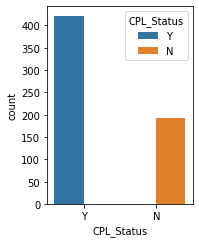

In [8]:
for i in range(len(columns)) :
    plt.figure(figsize = (12,8))
    plt.subplot(2, 4, i+1)
    sns.countplot(data = df_train, x = 'CPL_Status', hue = columns[i])

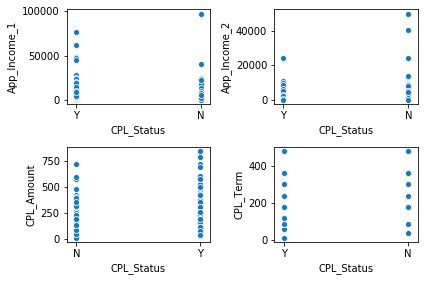

In [9]:
cont_columns = ['App_Income_1', 'App_Income_2', 'CPL_Amount', 'CPL_Term']

for i in range(len(cont_columns)) :
    plt.tight_layout()
    plt.subplot(2, 2, i+1)
    sns.scatterplot(y = cont_columns[i], x = 'CPL_Status', data = df_train)

C:\Users\AMANJEET PANI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\AMANJEET PANI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


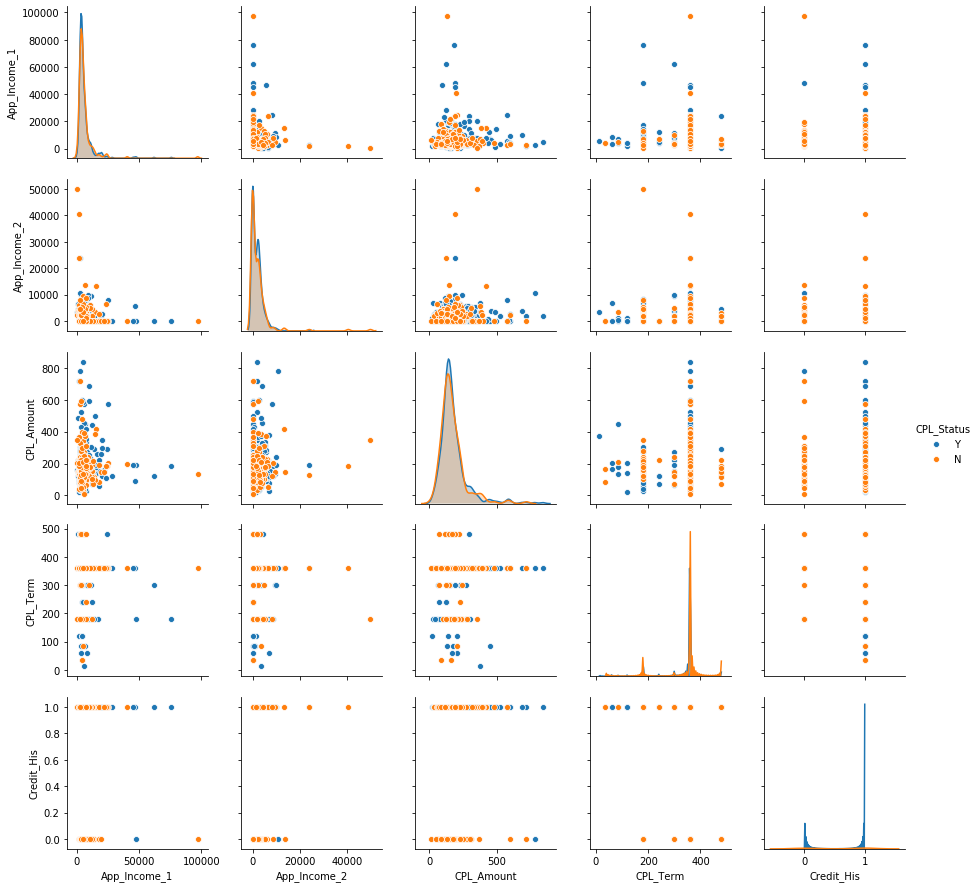

In [10]:
sns.pairplot(df_train, hue = 'CPL_Status')

# Feature Engineering

In [11]:
# to check the no of null values in each column

def no_of_null(dataset, name) :
    print(name)
    print(dataset.isnull().sum())
    print('\n')

In [12]:
no_of_null(df_train, "TRAIN SET")
no_of_null(df_test, "TEST SET")

TRAIN SET
Sex               13
Marital_Status     3
Dependents        15
Qual_var           0
SE                32
App_Income_1       0
App_Income_2       0
CPL_Amount         2
CPL_Term          14
Credit_His        50
Prop_Area          0
CPL_Status         0
dtype: int64


TEST SET
Sex               11
Marital_Status     0
Dependents        10
Qual_var           0
SE                23
App_Income_1       0
App_Income_2       0
CPL_Amount         0
CPL_Term           6
Credit_His        29
Prop_Area          0
dtype: int64




In [13]:
# to check the %age of null values in each column

def percent_of_null(dataset, name) :
    print(name)
    print(dataset.isnull().sum() / len(dataset) * 100)
    print('\n')

In [14]:
percent_of_null(df_train, "TRAIN SET")
percent_of_null(df_test, "TEST SET")

TRAIN SET
Sex               2.117264
Marital_Status    0.488599
Dependents        2.442997
Qual_var          0.000000
SE                5.211726
App_Income_1      0.000000
App_Income_2      0.000000
CPL_Amount        0.325733
CPL_Term          2.280130
Credit_His        8.143322
Prop_Area         0.000000
CPL_Status        0.000000
dtype: float64


TEST SET
Sex               2.997275
Marital_Status    0.000000
Dependents        2.724796
Qual_var          0.000000
SE                6.267030
App_Income_1      0.000000
App_Income_2      0.000000
CPL_Amount        0.000000
CPL_Term          1.634877
Credit_His        7.901907
Prop_Area         0.000000
dtype: float64




In [15]:
# drop those columns which are string and have < 5% missing values

df_train = df_train.dropna(subset = ['Sex', 'Marital_Status', 'Dependents', 'CPL_Amount', 'CPL_Term'])
df_test = df_test.dropna(subset = ['Sex', 'Dependents', 'CPL_Term'])

In [16]:
# fill the missing values of SE column with the previous valid value of that column

df_train['SE'] = df_train['SE'].fillna(method = 'ffill', axis = 0)
df_test['SE'] = df_test['SE'].fillna(method = 'ffill', axis = 0)

C:\Users\AMANJEET PANI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# fill the  missing values of Credit_His column with the mean value for that column

def fill_missing_values(dataset) :
    if dataset['Credit_His'].mean() > 0.5 :
        dataset['Credit_His'] = dataset['Credit_His'].fillna(value = 1, axis = 0)
    else :
        dataset['Credit_His'] = dataset['Credit_His'].fillna(value = 0, axis = 0)
    return dataset

In [18]:
df_train = fill_missing_values(df_train)
df_test = fill_missing_values(df_test)

C:\Users\AMANJEET PANI\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [19]:
no_of_null(df_train, 'TRAIN SET')
no_of_null(df_test, 'TEST SET')

TRAIN SET
Sex               0
Marital_Status    0
Dependents        0
Qual_var          0
SE                0
App_Income_1      0
App_Income_2      0
CPL_Amount        0
CPL_Term          0
Credit_His        0
Prop_Area         0
CPL_Status        0
dtype: int64


TEST SET
Sex               0
Marital_Status    0
Dependents        0
Qual_var          0
SE                0
App_Income_1      0
App_Income_2      0
CPL_Amount        0
CPL_Term          0
Credit_His        0
Prop_Area         0
dtype: int64




In [20]:
def get_dtypes(dataset, name) :
    print(name)
    print(dataset.dtypes)
    print('\n')

In [21]:
#to check the datatypes of each column

get_dtypes(df_train, "TRAIN SET")
get_dtypes(df_test, "TEST SET")

TRAIN SET
Sex                object
Marital_Status     object
Dependents         object
Qual_var           object
SE                 object
App_Income_1      float64
App_Income_2      float64
CPL_Amount        float64
CPL_Term          float64
Credit_His        float64
Prop_Area          object
CPL_Status         object
dtype: object


TEST SET
Sex                object
Marital_Status     object
Dependents         object
Qual_var           object
SE                 object
App_Income_1      float64
App_Income_2      float64
CPL_Amount        float64
CPL_Term          float64
Credit_His        float64
Prop_Area          object
dtype: object




In [22]:
# create dummy variable and drop the original column for each categorical column

def to_categorical(dataset) :
    dummies = pd.get_dummies(dataset, columns = ['Sex', 'Marital_Status', 'Dependents', 'Qual_var', 'SE', 'Prop_Area'], drop_first = True)
    return dummies

In [23]:
df_train = to_categorical(df_train)
df_test = to_categorical(df_test)

In [24]:
dummy = pd.get_dummies(df_train['CPL_Status'], drop_first = True)
df_train = df_train.drop('CPL_Status', axis = 1)
df_train = pd.concat([df_train, dummy], axis = 1)

In [25]:
df_train.head()

,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Sex_M,Marital_Status_Y,Dependents_1,Dependents_2,Dependents_3+,Qual_var_Non Grad,SE_Y,Prop_Area_Semi U,Prop_Area_Urban,Y
1,5499.6,1809.6,153.6,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3600.0,0.0,79.2,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,3099.6,2829.6,144.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,7200.0,0.0,169.2,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,6500.4,5035.2,320.4,360.0,1.0,1,1,0,1,0,0,1,0,1,1


In [26]:
# we need to rename the target column to a more convenient name, since it was changed 

df_train = df_train.rename(columns = {'Y' : 'CPL_Status'})

In [27]:
get_dtypes(df_train, "TRAIN SET")
get_dtypes(df_test, "TEST SET")

TRAIN SET
App_Income_1         float64
App_Income_2         float64
CPL_Amount           float64
CPL_Term             float64
Credit_His           float64
Sex_M                  uint8
Marital_Status_Y       uint8
Dependents_1           uint8
Dependents_2           uint8
Dependents_3+          uint8
Qual_var_Non Grad      uint8
SE_Y                   uint8
Prop_Area_Semi U       uint8
Prop_Area_Urban        uint8
CPL_Status             uint8
dtype: object


TEST SET
App_Income_1         float64
App_Income_2         float64
CPL_Amount           float64
CPL_Term             float64
Credit_His           float64
Sex_M                  uint8
Marital_Status_Y       uint8
Dependents_1           uint8
Dependents_2           uint8
Dependents_3+          uint8
Qual_var_Non Grad      uint8
SE_Y                   uint8
Prop_Area_Semi U       uint8
Prop_Area_Urban        uint8
dtype: object




In [28]:
# to check the correlation of each column of the dataset with each other
df_train.corr()

,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Sex_M,Marital_Status_Y,Dependents_1,Dependents_2,Dependents_3+,Qual_var_Non Grad,SE_Y,Prop_Area_Semi U,Prop_Area_Urban,CPL_Status
App_Income_1,1.000000,-0.108449,0.031098,-0.039125,-0.044563,0.055236,0.038984,0.045036,-0.028612,0.104880,-0.133853,0.143373,-0.009252,-0.014382,-0.032088
App_Income_2,-0.108449,1.000000,0.088806,-0.057810,0.009277,0.078265,0.064365,-0.033878,0.006501,0.055490,-0.072101,-0.031439,-0.026738,0.037258,-0.063209
CPL_Amount,0.031098,0.088806,1.000000,-0.008742,0.006679,-0.031797,0.072036,0.081990,0.086258,0.062270,-0.106363,-0.043891,0.008238,0.016092,0.042352
CPL_Term,-0.039125,-0.057810,-0.008742,1.000000,0.021134,-0.087174,-0.103351,-0.078728,-0.010175,-0.081563,-0.077637,-0.024070,0.055181,-0.087712,-0.014120
Credit_His,-0.044563,0.009277,0.006679,0.021134,1.000000,0.014362,0.018805,0.001840,0.013743,-0.072188,-0.050286,-0.026493,0.040149,-0.021812,0.508520
Sex_M,0.055236,0.078265,-0.031797,-0.087174,0.014362,1.000000,0.357581,-0.005168,0.135377,0.093826,0.051076,-0.006822,-0.123618,0.057641,0.026409
Marital_Status_Y,0.038984,0.064365,0.072036,-0.103351,0.018805,0.357581,1.000000,0.116159,0.258682,0.139749,0.006556,-0.017953,-0.002208,0.016505,0.104116
Dependents_1,0.045036,-0.033878,0.081990,-0.078728,0.001840,-0.005168,0.116159,1.000000,-0.211026,-0.137998,-0.004115,0.071643,0.015600,0.068632,-0.045319
Dependents_2,-0.028612,0.006501,0.086258,-0.010175,0.013743,0.135377,0.258682,-0.211026,1.000000,-0.137161,0.020853,0.033357,-0.018744,0.032430,0.072042
Dependents_3+,0.104880,0.055490,0.062270,-0.081563,-0.072188,0.093826,0.139749,-0.137998,-0.137161,1.000000,0.061531,-0.007799,-0.000344,-0.041825,-0.037070


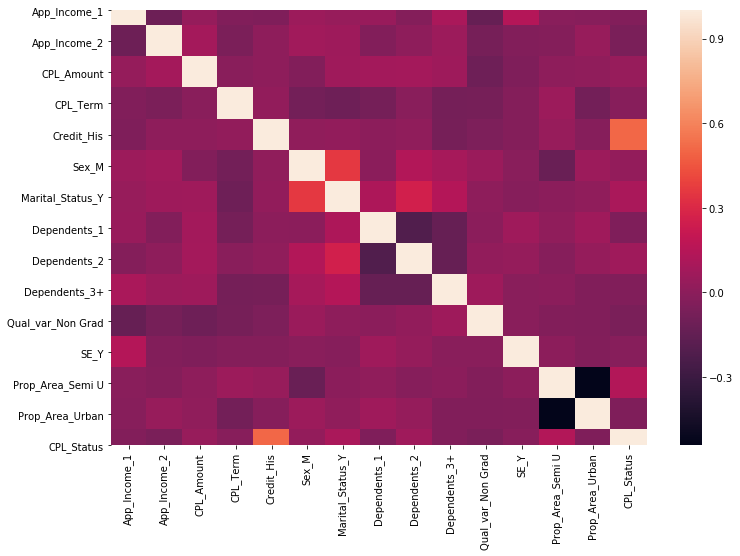

In [29]:
# to plot the heatmap of the correlation dataframe

plt.figure(figsize = (12, 8))
sns.heatmap(df_train.corr())

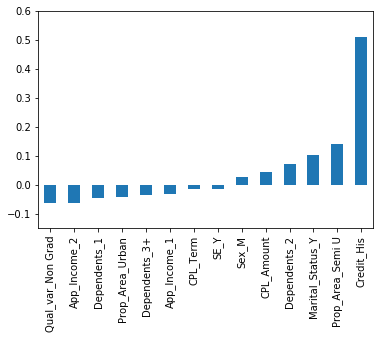

In [30]:
# to plot a bar chart for the correlation of each column with the target column

plt.ylim(-0.15, 0.6)
df_train.corr()['CPL_Status'].sort_values()[:-1].plot(kind = 'bar')

In [31]:
# drop the CPL_Term column since it is the least related and doesn't make a difference for our prediction

df_train = df_train.drop('CPL_Term', axis = 1)
df_test = df_test.drop('CPL_Term', axis = 1)

In [32]:
# separate the independent and the dependent features for training of model

X = df_train.drop('CPL_Status', axis = 1)
y = df_train['CPL_Status']

# Train - Test Split

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [34]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(428, 13) (143, 13) (428,) (143,)


# Feature Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Creation

In [36]:
# import all the model classes from their respective classes and create an object for each

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

from sklearn.svm import SVC
model2 = SVC()

from sklearn.neighbors import KNeighborsClassifier
#model3 = KNeighborsClassifier()

from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier()

from xgboost import XGBClassifier
model6 = XGBClassifier()

# For SVC

In [37]:
from sklearn.model_selection import RandomizedSearchCV

params2 = {'C': [0.1, 1, 10, 100, 1000],  
           'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
           'kernel': ['rbf']}
r_search2 = RandomizedSearchCV(model2, param_distributions = params2, n_iter = 5,
                                   scoring = 'roc_auc', n_jobs = -1, cv = 5, verbose = 3)
r_search2.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    5.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.6s finished
C:\Users\AMANJEET PANI\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=3)

In [38]:
r_search2.best_params_

{'kernel': 'rbf', 'gamma': 0.0001, 'C': 1000}

In [39]:
r_search2.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
model2 = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
            decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
            max_iter=-1, probability=False, random_state=None, shrinking=True,
            tol=0.001, verbose=False)

# For KNN

In [41]:
losses = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    ith_pred = knn.predict(X_test)
    losses.append(np.mean(ith_pred != y_test))

Text(0, 0.5, 'Losses')

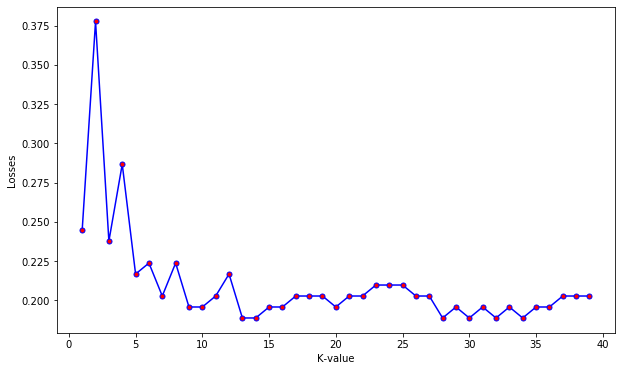

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), losses, color = 'blue', marker='o', markerfacecolor = 'red', markersize = 5)
plt.xlabel('K-value')
plt.ylabel('Losses')

In [55]:
model3 = KNeighborsClassifier(n_neighbors = 14)

# For RandomForest

In [44]:
params5 = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
           'max_features': ['auto', 'sqrt'],
           'min_samples_leaf': [1, 2, 4],
           'min_samples_split': [2, 5, 10],
           'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
r_search5 = RandomizedSearchCV(model5, param_distributions = params5, n_iter = 5,
                                   scoring = 'roc_auc', n_jobs = -1, cv = 5, verbose = 3)
r_search5.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   10.4s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   13.1s finished
C:\Users\AMANJEET PANI\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [45]:
r_search5.best_params_

{'n_estimators': 1800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60}

In [46]:
r_search5.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=60, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
model5 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                max_depth=60, max_features='sqrt', max_leaf_nodes=None,
                                min_impurity_decrease=0.0, min_impurity_split=None,
                                min_samples_leaf=4, min_samples_split=10,
                                min_weight_fraction_leaf=0.0, n_estimators=800,
                                n_jobs=None, oob_score=False, random_state=None,
                                verbose=0, warm_start=False)

# For XGBoost

In [48]:
params6 = {"learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
          "max_depth" : [ 3, 4, 5, 6, 8, 10 ],
          "min_child_weight" : [ 1, 3, 5, 7 ],
          "gamma" : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
          "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
          "colsample_bylevel" : [ 0.5, 0.7, 0.9, 1 ]}
r_search6 = RandomizedSearchCV(model6, param_distributions = params6, n_iter = 5,
                                   scoring = 'roc_auc', n_jobs = -1, cv = 5, verbose = 3)
r_search6.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    2.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.9s finished
C:\Users\AMANJEET PANI\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_co...
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bylevel': [0.5, 0.7, 0.9, 1],
                                        'colsample_bytree': [0.3, 0.4, 0.5,
               

In [49]:
r_search6.best_params_

{'min_child_weight': 5,
 'max_depth': 8,
 'learning_rate': 0.2,
 'gamma': 0.4,
 'colsample_bytree': 0.3,
 'colsample_bylevel': 0.5}

In [50]:
r_search6.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
model6 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
                          colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
                          importance_type='gain', interaction_constraints='',
                          learning_rate=0.05, max_delta_step=0, max_depth=5,
                          min_child_weight=7, missing=np.nan, monotone_constraints='()',
                          n_estimators=100, n_jobs=0, num_parallel_tree=1,
                          objective='binary:logistic', random_state=0, reg_alpha=0,
                          reg_lambda=1, scale_pos_weight=1, subsample=1,
                          tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
models = [model1, model2, model3, model4, model5, model6]

In [53]:
# for calculating the accuracy and f1_score for each model

from sklearn.metrics import accuracy_score

In [56]:
# loop through each model

i = 1
for model in models :
    # fit the train sets
    model.fit(X_train, y_train)
    
    # predict the target column for the test set
    y_pred = model.predict(X_test)
    
    # calculate the accuracy obtained
    print("ACCURACY SCORE for model%d = %f percent" %(i ,accuracy_score(y_test, y_pred)*100))
    i +=1

C:\Users\AMANJEET PANI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ACCURACY SCORE for model1 = 82.517483 percent
ACCURACY SCORE for model2 = 76.223776 percent
ACCURACY SCORE for model3 = 80.419580 percent
ACCURACY SCORE for model4 = 66.433566 percent
ACCURACY SCORE for model5 = 83.916084 percent
ACCURACY SCORE for model6 = 83.916084 percent


# New Prediction for the Test Dataset File

In [61]:
# make similar changes for the test set (which we have already did in terms of df_test)
# scale the test set and predict the target column with model6, i.e., XGBoost Classifier which gave the maximum accuracy

df_test = sc.transform(df_test)
test_pred = model6.predict(df_test)

In [62]:
# replace 1 with Y and 0 with N to match the format of the test dataset file

CPL_Status = ["" for x in range(len(test_pred))]
for i in range(len(test_pred)) :
    if test_pred[i] == 1 :
        CPL_Status[i] = 'Y'
    else :
        CPL_Status[i] = 'N'

In [63]:
# to make changes in the original test dataset file

test_data = pd.read_excel('Project - 4 - Test Data.xlsx')

# we just need to handle the missing values in our test dataset to maintain similar shape of dataset and the predicted column
test_data = test_data.dropna(subset = ['Sex', 'Dependents', 'CPL_Term'])
test_data['SE'] = test_data['SE'].fillna(method = 'ffill', axis = 0)
test_data = fill_missing_values(test_data)

# now create a column and add the model predictions
test_data['CPL_Status'] = CPL_Status

In [64]:
test_data.head()

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,INT_ID,Prev_ID,AGT_ID,Prop_Area,CPL_Status
0,CPL001015,M,Y,Dollie,Scafe,dscafe0@is.gd,02 Garrison Pass,0,Grad,N,6864.0,0.0,132.0,360.0,1.0,6869736235,79-489-1539,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6...,Urban,Y
1,CPL001022,M,Y,Kim,Arne,karne9@infoseek.co.jp,6568 Dwight Point,1,Grad,N,3691.2,1800.0,151.2,360.0,1.0,3383749711,75-757-9174,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_2)...,Urban,Y
2,CPL001031,M,Y,Niccolo,Ramble,nramblef@gov.uk,3504 Lukken Park,2,Grad,N,6000.0,2160.0,249.6,360.0,1.0,7247894032,42-085-4345,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Urban,Y
3,CPL001035,M,Y,Rabbi,Haig,rhaigg@tiny.cc,1334 Florence Way,2,Grad,N,2808.0,3055.2,120.0,360.0,1.0,3240492342,10-813-9695,Mozilla/5.0 (X11; Linux i686) AppleWebKit/534....,Urban,Y
4,CPL001051,M,N,Gracie,Winear,gwinearj@devhub.com,9800 Ridge Oak Crossing,0,Non Grad,N,3931.2,0.0,93.6,360.0,1.0,1670564037,20-195-4948,Mozilla/5.0 (Windows NT 6.0) AppleWebKit/534.2...,Urban,N
